In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_excel('regionalgrossdomesticproductgdpallitlregions.xlsx',sheet_name='Table 11',header=1)

In [8]:
#Creates a TLi column in the dataframe and asigns a value
#corresponsing to the regions's row. It will be used later on to create a multiindex
def region_clasification(df,reg_class_name):
    #Creates the ITLi column in the dataframe
    df.insert(loc=0,column=reg_class_name,value=pd.NA)
    #Identifies the indexes where the region names are located
    reg_class_index=df[df['ITL']==reg_class_name].index
    
    #Asigns the correct region names to their correct subregion rows
    #The way it's through taking a slice of indexes reg_class_index[i]:reg_class_index[i+1] and asigning
    #the region name to the extra column created in the dataframe.
    for i in range(0,len(reg_class_index)-1):
        df.loc[reg_class_index[i]:reg_class_index[i+1]-1,reg_class_name]=df.loc[reg_class_index[i],'Region name']
    df.loc[reg_class_index[-1]:,reg_class_name]=df.loc[reg_class_index[-1],'Region name']
    return df

In [9]:
df=(
    region_clasification(df,'ITL1')
    # Eliminates the rows for ITL1 label
    .pipe(lambda df:df[df['ITL']!='ITL1'])
    .pipe(lambda df:region_clasification(df,'ITL2'))
    # Eliminates the rows for ITL2 label
    .pipe(lambda df:df[df['ITL']!='ITL2'])
    .pipe(lambda df:df.iloc[2:,:])
    .set_index(keys=['ITL1','ITL2','Region name'])
    .drop(columns=['ITL','ITL code'])
    .T
)

(181,)

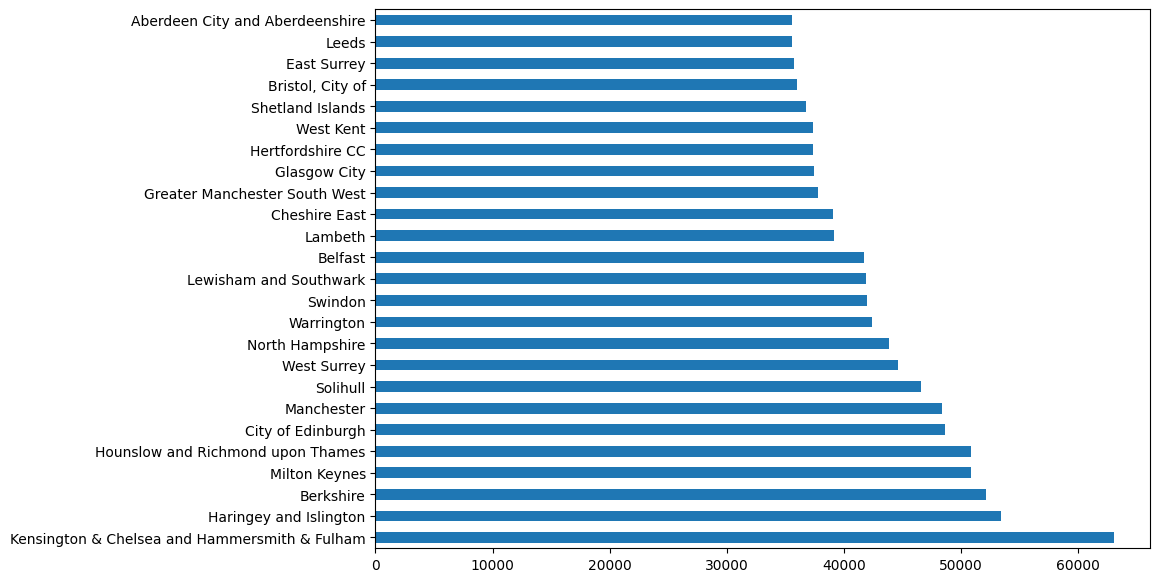

In [ ]:
#Use df.columns.to_flat_index() to undo the multiindex and then takes the region name and 
#assigns it to the column name
df.columns=list(map(lambda x:x[2],df.columns.to_flat_index().to_list()))
df.columns.sort_values().to_list()
# df[['Aberdeen City and Aberdeenshire','City of Edinburgh','Glasgow City']]
top_five=df.iloc[-1,:].sort_values(ascending=False).head(20)
bottom_five=df.iloc[-1,:].sort_values(ascending=False).tail().index

# (df[[*top_five,*bottom_five]]
# .plot(kind='barh',
# subplots=[tuple(top_five),tuple(bottom_five)],
# legend=False)
# )
df.iloc[-1,:].sort_values(ascending=False)[3:28].plot(kind='barh',figsize=(10,7))
df.iloc[-1,:].shape